In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

# Importing the Dataset 
- Load in the data from `fabricated_data`

In [2]:
import pathlib

# Load in the spectrograms from the fabricated data directory
data_dir = '../fabricated_data'
data_dir = pathlib.Path(data_dir)
image_count = len(list(data_dir.glob('*/*.png')))
print(image_count) # Number of images in our dataset


5000


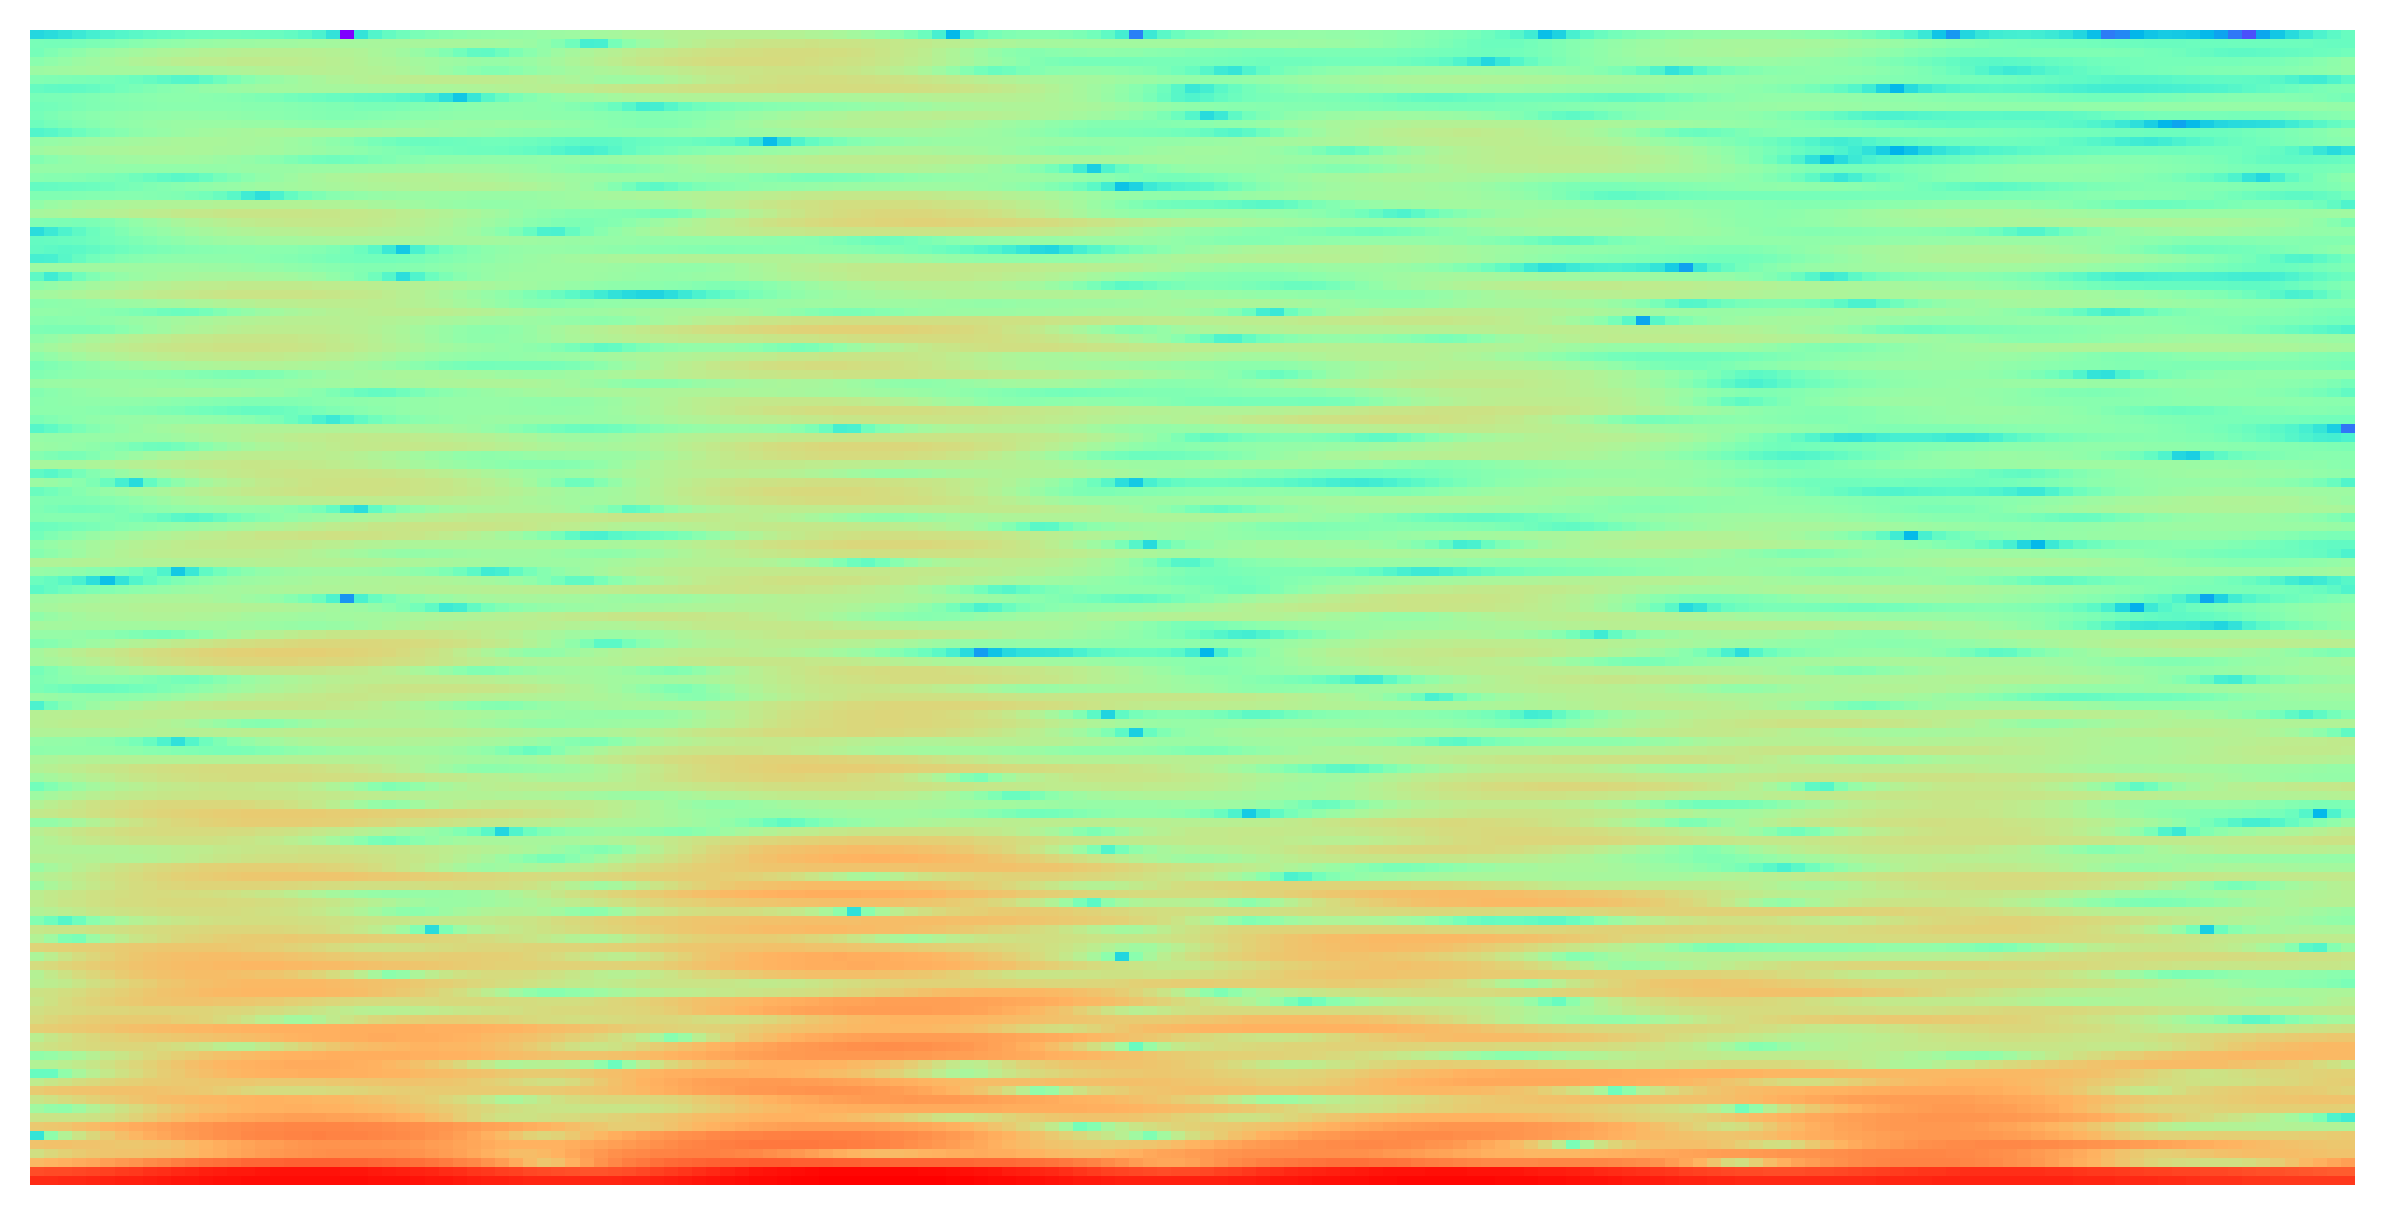

In [3]:
# View the first image of scope 0
scope_0 = list(data_dir.glob('0/*'))
PIL.Image.open(str(scope_0[1]))

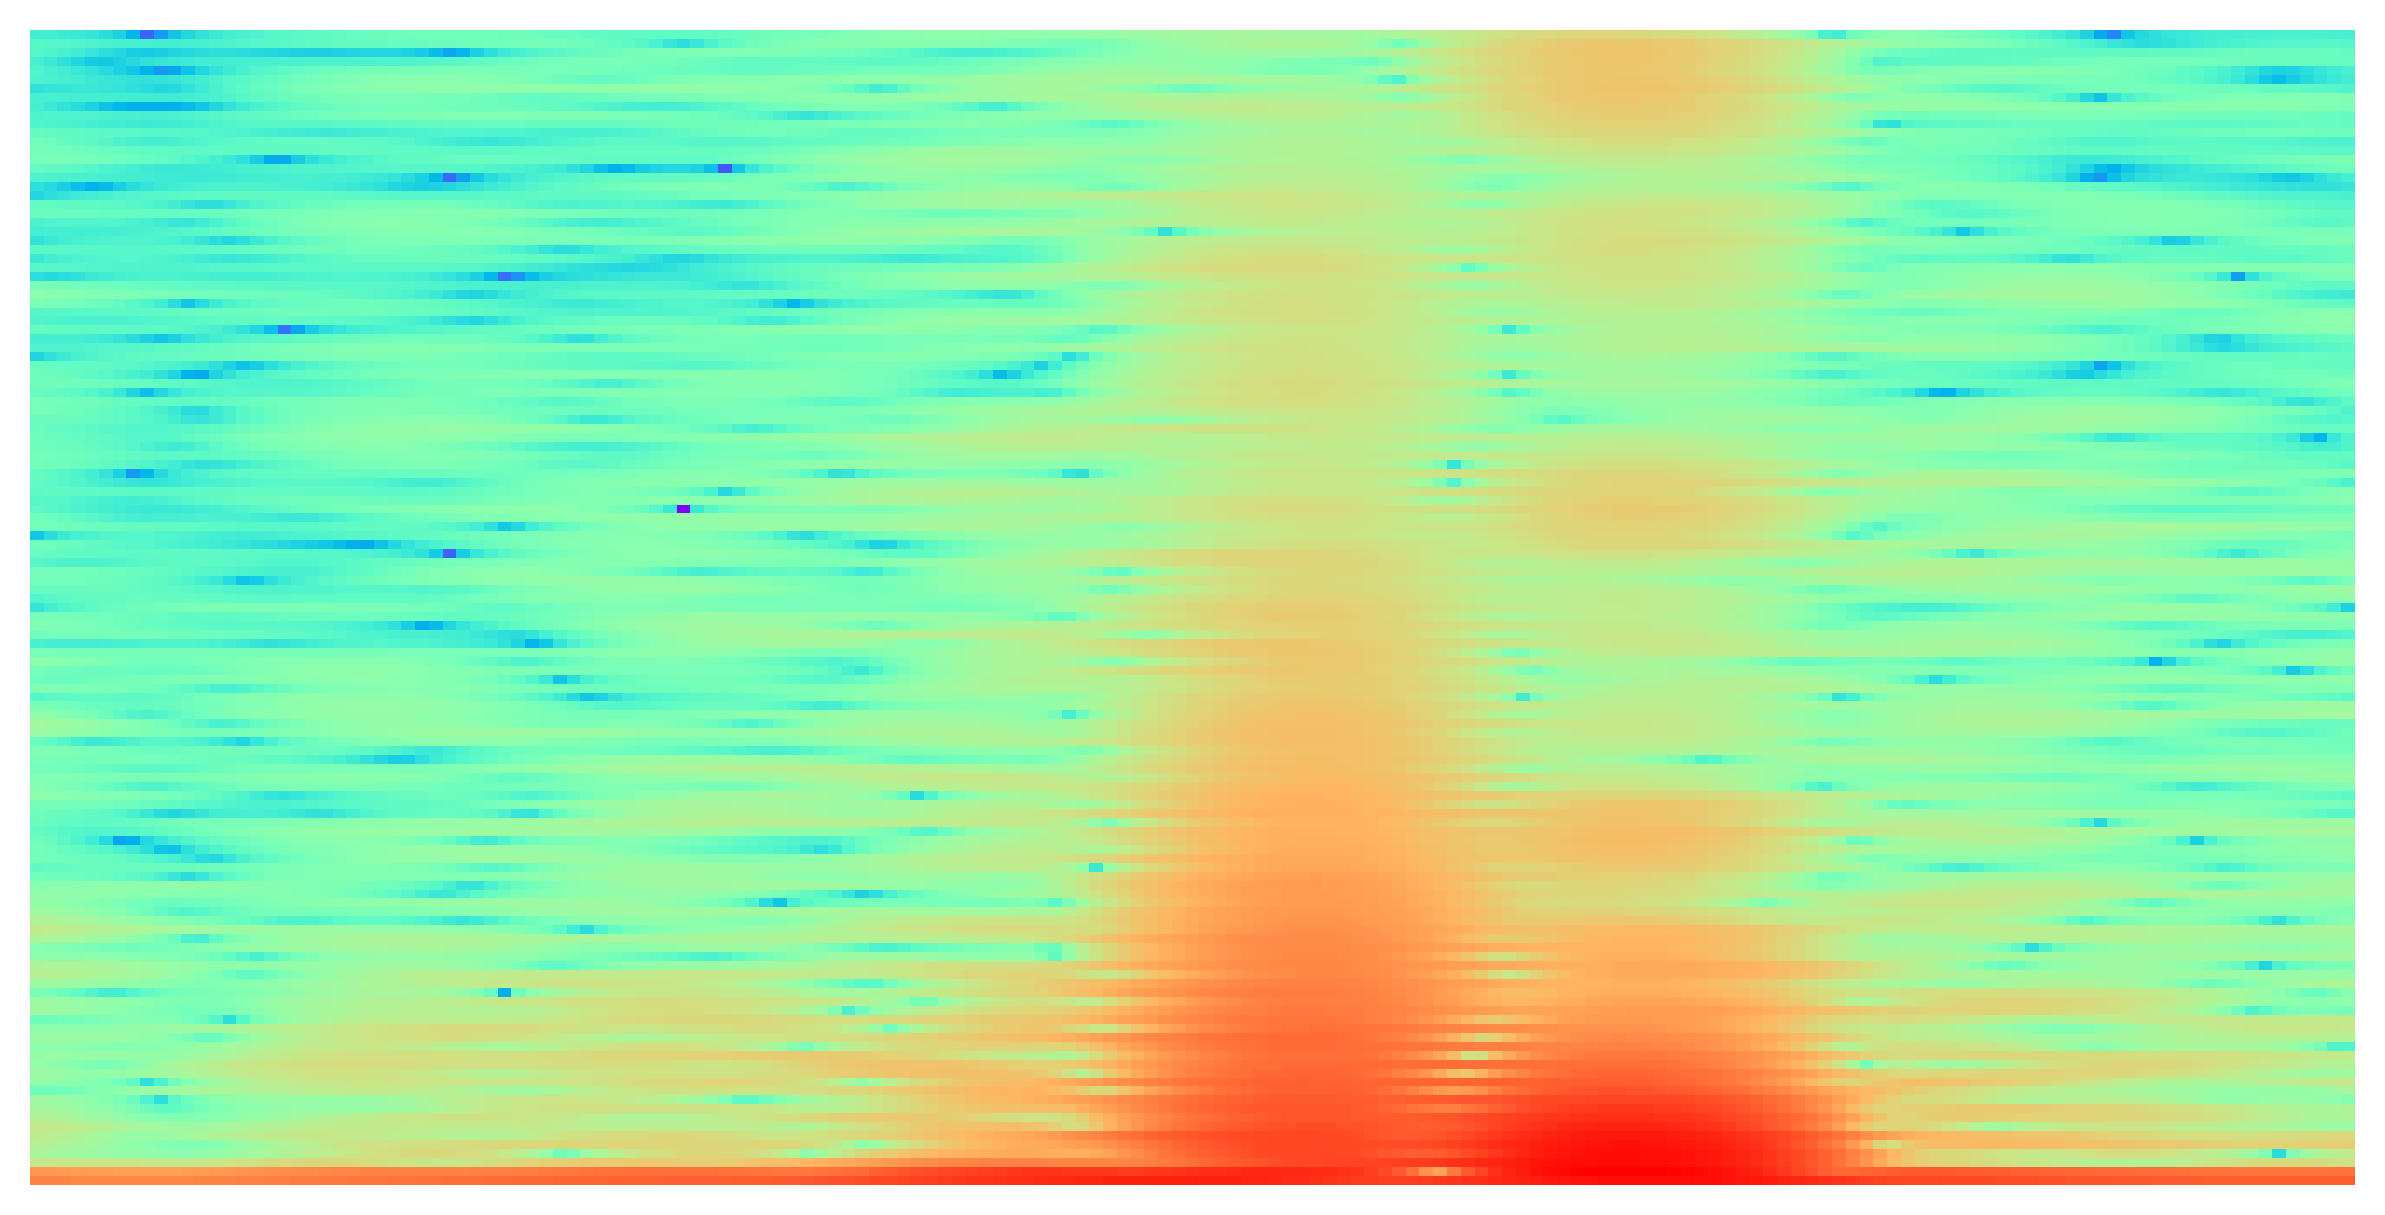

In [4]:
# View the first image of scope 1
scope_1 = list(data_dir.glob('1/*'))
PIL.Image.open(str(scope_1[1]))

# Creating a dataset


In [5]:

batch_size = 32
img_height = 1215
img_width = 2385

## Splitting dataset into two

- One for training and one for validating
- It will be split in the ratio 80% testing, 20% validating

In [6]:
# Training dataset will take 80% of data
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 5000 files belonging to 5 classes.
Using 4000 files for training.


In [7]:
# Validating dataset will take 20% of data
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 5000 files belonging to 5 classes.
Using 1000 files for validation.


## Class Names

- These correspond to the directory names in alphabetical order.

In [8]:
# Class names refer to the categories our model will predict
class_names = train_ds.class_names
print(class_names)

['0', '1', '2', '3', '4']


## Visualise our data

In [9]:
import matplotlib.pyplot as plt

# plt.figure(figsize=(10, 10))
# for images, labels in train_ds.take(1):
#   for i in range(9):
#     ax = plt.subplot(3, 3, i + 1)
#     plt.imshow(images[i].numpy().astype("uint8"))
#     plt.title(class_names[labels[i]])
#     plt.axis("off")

The image_batch is a tensor of the shape (32, 1215, 2385, 3). This is a batch of 32 images of shape 1215x2385x3 (the last dimension refers to color channels RGB). The label_batch is a tensor of the shape (32,), these are corresponding labels to the 32 images.

In [10]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 1215, 2385, 3)
(32,)


In [11]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

## Standardise the Data

- RGB is given a value between 0 and 255, we instead want something in the range of [0,1] so we will simply divide all RGB values by 255

In [12]:
normalization_layer = layers.experimental.preprocessing.Rescaling(1./255)

# Create the Model


In [13]:
num_classes = 5

model = Sequential([
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

## Compile the model

In [14]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling_1 (Rescaling)      (None, 1215, 2385, 3)     0         
_________________________________________________________________
conv2d (Conv2D)              (None, 1215, 2385, 16)    448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 607, 1192, 16)     0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 607, 1192, 32)     4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 303, 596, 32)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 303, 596, 64)      18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 151, 298, 64)      0

# Training the Model

In [17]:
epochs=5
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/5


In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

Error: Kernel is dead